In [122]:
import matplotlib.pyplot as plt
import sys
import pandas as pd
from numpy import genfromtxt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
import math
from datetime import datetime

In [123]:
systoleFile = 'Systole BP Updated.xlsx'
writerSys = pd.ExcelWriter(systoleFile, engine = 'openpyxl')
diastoleFile = 'Diastole BP Updated.xlsx'
writerDia = pd.ExcelWriter(diastoleFile, engine = 'openpyxl')

In [124]:
systolicBP = pd.read_csv('Systolic BP.csv')
diastolicBP = pd.read_csv('Diastolic BP.csv')

In [125]:
systole = pd.DataFrame(systolicBP)
diastole = pd.DataFrame(diastolicBP)

In [126]:
bpData = pd.read_excel('Final- BP Data Set.xlsx')
data = pd.DataFrame(bpData)
data['Zung Score'] = data['Zung Score'].astype(int)
data['Systolic BP'] = data['Systolic BP'].astype(int)
data['Diastolic BP'] = data['Diastolic BP'].astype(int)
data

,Timestamp,Name,Systolic BP,Diastolic BP,Zung Score
0,2022-04-11 17:47:57.431,Andrew,121,73,28
1,2022-04-12 12:43:28.076,Andrew,123,75,22
2,2022-04-12 13:54:31.848,Andrew,109,72,24
3,2022-04-13 09:25:09.369,Andrew,120,70,20
4,2022-04-13 21:27:07.931,Andrew,135,75,22
5,2022-04-14 08:45:32.499,Andrew,116,70,24
6,2022-04-15 02:34:50.476,Andrew,118,76,22
7,2022-04-15 20:24:36.380,Andrew,128,69,20
8,2022-04-11 16:46:58.368,Jacob,121,79,25
9,2022-04-11 22:51:18.155,Jacob,119,81,27


In [127]:
systole = data[['Zung Score', 'Systolic BP']]
diastole = data[['Zung Score', 'Diastolic BP']]

In [128]:
systole.head(10)

,Zung Score,Systolic BP
0,28,121
1,22,123
2,24,109
3,20,120
4,22,135
5,24,116
6,22,118
7,20,128
8,25,121
9,27,119


In [129]:
diastole.head(10)

,Zung Score,Diastolic BP
0,28,73
1,22,75
2,24,72
3,20,70
4,22,75
5,24,70
6,22,76
7,20,69
8,25,79
9,27,81


In [130]:
scoresSystole = systole["Zung Score"]
scoresDiastole = diastole["Zung Score"]

In [131]:
bpSystole = systole["Systolic BP"]
bpDiastole = diastole["Diastolic BP"]

In [132]:
def plotGraph(x, y, bpType):
    plt.scatter(x, y, c='b', marker='o')
    plt.xlabel('Zung Score', fontsize=16)
    plt.ylabel(bpType + ' BP', fontsize=16)
    plt.title('Zung Score vs ' + bpType + ' BP', fontsize=20)
    plt.show()

In [133]:
def plotOutlier(data, x, y, bpType, myEps):
    bp_data = data.iloc[:, 0:2].values
    model = DBSCAN(eps=myEps, min_samples=3).fit(bp_data)
    colors = model.labels_
    plt.scatter(x, y, c=colors, marker='o')
    plt.xlabel('Zung Score', fontsize=16)
    plt.ylabel(bpType + ' BP', fontsize=16)
    plt.title('Zung Score vs ' + bpType +' BP', fontsize=20)
    plt.show()

In [134]:
def linRegVals(data):
    X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    n = np.size(X)
    x_mean,y_mean

    Sxy = np.sum(X*Y)- n*x_mean*y_mean
    Sxx = np.sum(X*X)-n*x_mean*x_mean

    b1 = Sxy/Sxx
    b0 = y_mean-b1*x_mean
    print('The slope is', b1)
    print('The y intercept is', b0)

In [135]:
def linearRegression(data, bpType):
    X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    r2 = linear_regressor.score(X, Y)
    r = math.sqrt(r2)
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.xlabel("Zung Score")
    plt.ylabel(bpType)
    plt.show()
    linRegVals(data)
    print("R value is " + str(r))

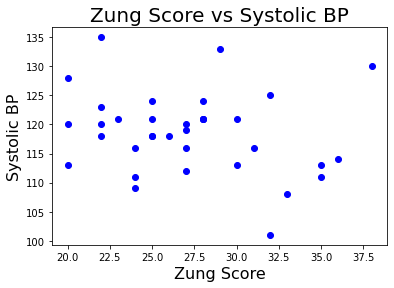

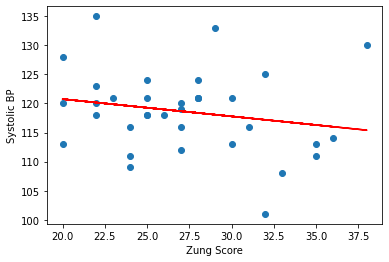

The slope is -0.29719626168224045
The y intercept is 126.69532710280367
R value is 0.20140589716149


In [136]:
plotGraph(scoresSystole, bpSystole, 'Systolic')
linearRegression(systole, "Systolic BP")

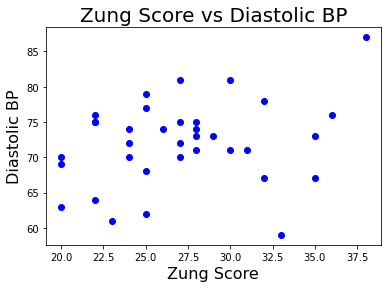

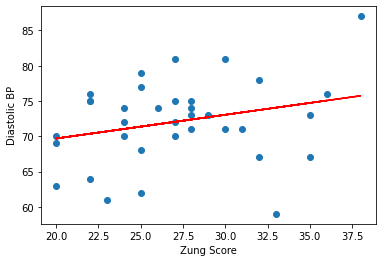

The slope is 0.3357009345794286
The y intercept is 62.97383177570123
R value is 0.26738266111840286


In [137]:
plotGraph(scoresDiastole, bpDiastole, 'Diastolic')
linearRegression(diastole, "Diastolic BP")

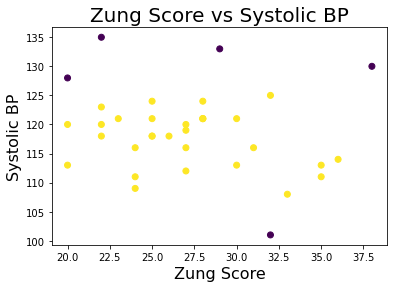

In [138]:
plotOutlier(systole, scoresSystole, bpSystole, 'Systolic', 5)

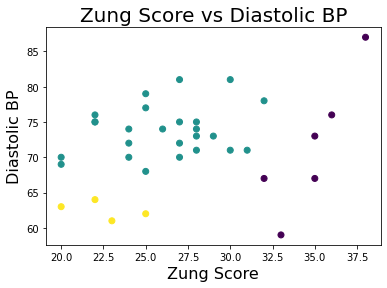

In [139]:
plotOutlier(diastole, scoresDiastole, bpDiastole, 'Diastolic', 4)

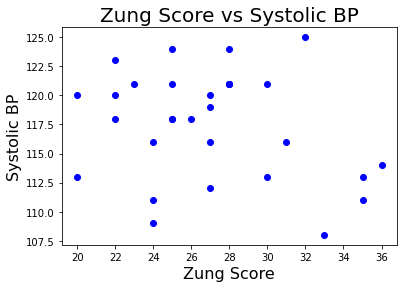

In [140]:
systoleParsed = systole.loc[(systole['Systolic BP'] < 126) & (systole['Systolic BP'] > 105)]
#systoleParsed = (systole[systoleParsed])
plotGraph(systoleParsed["Zung Score"], systoleParsed['Systolic BP'], 'Systolic')

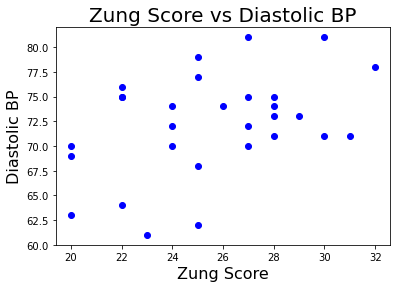

In [141]:
diastoleParsed = diastole.loc[(diastole['Zung Score'] < 32.5) & ~((diastole['Zung Score'] > 31) & (diastole['Diastolic BP'] < 67.5))]
#diastoleParsed = (diastole[diastoleParsed])
plotGraph(diastoleParsed["Zung Score"], diastoleParsed['Diastolic BP'], 'Diastolic')

Systole with Regression


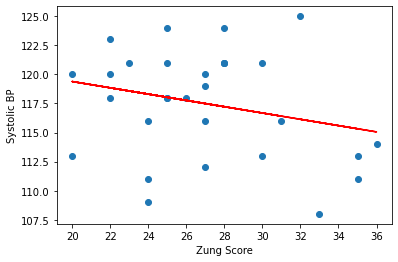

The slope is -0.2708115102594119
The y intercept is 124.80288372666215
R value is 0.2522517239627671


In [142]:
print("Systole with Regression")
linearRegression(systoleParsed, "Systolic BP")

Diastole with Regression


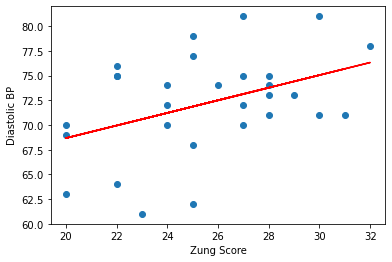

The slope is 0.6376348821845426
The y intercept is 55.91422594142256
R value is 0.4140377755794865


In [143]:
print("Diastole with Regression")
linearRegression(diastoleParsed, "Diastolic BP")

In [144]:
molly = data[data['Name']=='Molly']
andrew = data[data['Name']=='Andrew']
josh = data[data['Name']=='Josh']
jacob = data[data['Name']=='Jacob']
nevin = data[data['Name']=='Nevin']

In [145]:
def personalData(person):
    personSystole = person[['Zung Score', 'Systolic BP']]
    personDiastole = person[['Zung Score', 'Diastolic BP']]
    linearRegression(personSystole, "Systolic BP")
    linearRegression(personDiastole, "Diastolic BP")
    plt.scatter(person['Timestamp'], person['Diastolic BP'])
    plt.xlabel("Time")
    plt.ylabel("Diastolic BP")
    plt.show()
    
    
    fig, ax1 = plt.subplots()
    
    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)
    ax1.set_ylabel('Systolic BP', color=color)
    ax1.scatter(person['Timestamp'], person['Systolic BP'], color=color)
    ax1.plot(person['Timestamp'], person['Systolic BP'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Zung Score', color=color)  # we already handled the x-label with ax1
    ax2.scatter(person['Timestamp'], person['Zung Score'],color=color)
    ax2.plot(person['Timestamp'], person['Zung Score'],color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    plt.show()
    
    
    fig, ax1 = plt.subplots()
    
    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)
    ax1.set_ylabel('Diastolic BP', color=color)
    ax1.scatter(person['Timestamp'], person['Diastolic BP'], color=color)
    ax1.plot(person['Timestamp'], person['Diastolic BP'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Zung Score', color=color)  # we already handled the x-label with ax1
    ax2.scatter(person['Timestamp'], person['Zung Score'],color=color)
    ax2.plot(person['Timestamp'], person['Zung Score'],color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    #plt.scatter(person['Timestamp'], person['Zung Score'])
    #plt.xlabel("Time")
    #plt.ylabel("Systolic BP")
    plt.show()

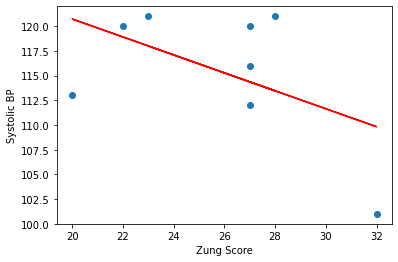

The slope is -0.9082125603864735
The y intercept is 138.8864734299517
R value is 0.5086285203824586


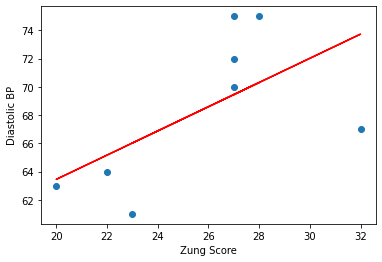

The slope is 0.857487922705314
The y intercept is 46.29468599033817
R value is 0.6050580671759557


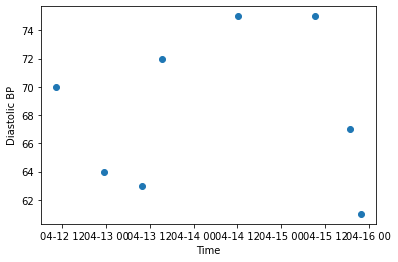

<ipython-input-145-f102a149fe44>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)


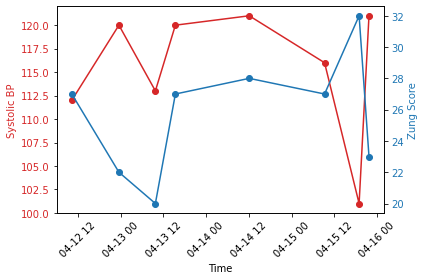

<ipython-input-145-f102a149fe44>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)


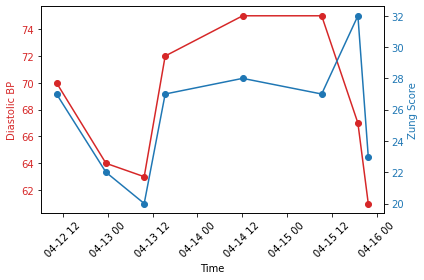

In [146]:
#personalData(nevin.loc[nevin['Zung Score'] < 31])
personalData(nevin)

In [147]:
diastoleParsed.to_excel(writerDia, index = False)
writerDia.save()

In [148]:
systoleParsed.to_excel(writerSys, index = False)
writerSys.save()